# Metin Sınıflandırma

In [25]:
import pandas as pd
import on_islem
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score , accuracy_score , confusion_matrix ,ConfusionMatrixDisplay
import matplotlib 
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv("data/metin_siniflandirma.csv" , index_col=0)
df["Text_2"] = df["Text"].apply(on_islem.pre_processing)
df["Text_2"] = df["Text_2"].apply(on_islem.remove_space)
df["Text_3"] = [' '.join(wrd for wrd in x) for x in df["Text_2"]]
df_index = df[df["Text_2"].str[0].isnull()].index
df = df.drop(df_index)
df = df.reset_index()
del df["index"]
df.head()

,Text,Label,Text_2,Text_3
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal oğl kand...
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, az, kal]",sebep di bağıracak az kal
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, bu, yıl, çıkar, bu, boku,...",black friday amk bu yıl çıkar bu boku mal nesiniz
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal


In [3]:
df.groupby("Label").size()

Label
korku      800
kızgın     799
mutlu      800
surpriz    800
üzgün      799
dtype: int64

In [4]:
msg_train , msg_test , label_train , label_test = train_test_split(df["Text_3"].tolist(), df["Label"].tolist() , test_size=0.2 , random_state=42)

In [5]:
df_test = pd.DataFrame({"text": msg_test , 'label' : label_test})
df_test.groupby("label").size()

label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

In [6]:
svm = Pipeline([('vect' , TfidfVectorizer()) , ('svm' , LinearSVC())])

In [7]:
svm.fit(msg_train , label_train)
y_pred_class = svm.predict(msg_test)

In [8]:
print("svm accuracy score: " ,accuracy_score(label_test , y_pred_class))

svm accuracy score:  0.98


In [9]:
print("svm f1 score:" , f1_score(label_test , y_pred_class , average="weighted"))

svm f1 score: 0.9800164473703513


In [10]:
len(label_test)*0.98

784.0

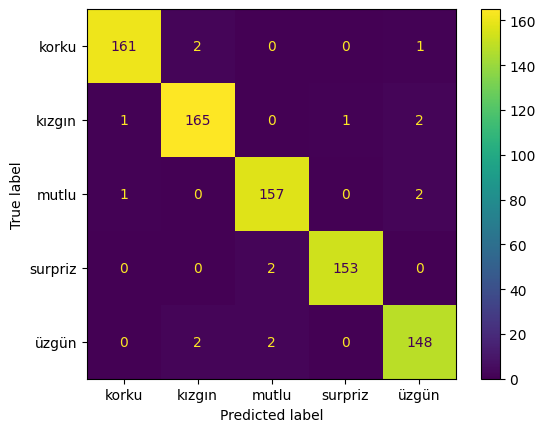

In [11]:
cm = confusion_matrix(label_test , y_pred_class , labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [12]:
msg_test_2 = ["ben biraz kötü gibiyim"]
y_pred_class = svm.predict(msg_test_2)
y_pred_class

array(['üzgün'], dtype='<U7')

In [18]:
model = Word2Vec.load("data/word2vec.model")
model.build_vocab(df["Text_2"].tolist(),update=True)
model.save("data/word2vec.model")

In [19]:
df["word2vec"] = df["Text_2"].apply(on_islem.word2vec)

In [20]:
df.head()

,Text,Label,Text_2,Text_3,word2vec
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...,"[-0.002819892717525363, 0.014595466665923595, ..."
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal oğl kand...,"[-0.0052143270149827, 0.011839079670608044, 0...."
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, az, kal]",sebep di bağıracak az kal,"[-0.002976463409140706, 0.013642929494380951, ..."
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, bu, yıl, çıkar, bu, boku,...",black friday amk bu yıl çıkar bu boku mal nesiniz,"[-0.018368545919656754, 0.03448396921157837, 0..."
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal,"[-0.005915171932429075, 0.011846324428915977, ..."


In [23]:
msg_train , msg_test , label_train , label_test = train_test_split(df["word2vec"].tolist(), df["Label"].tolist() , test_size=0.2 , random_state=42)
svm = Pipeline([('svm' , LinearSVC())])
svm.fit(msg_train , label_train)
y_pred_class = svm.predict(msg_test)
print("svm accuracy score: " ,accuracy_score(label_test , y_pred_class))
print("svm f1 score:" , f1_score(label_test , y_pred_class , average="weighted"))


svm accuracy score:  0.39375
svm f1 score: 0.3783110822210418


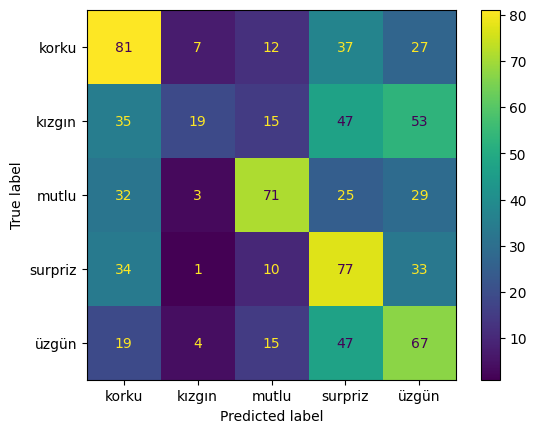

In [24]:
cm = confusion_matrix(label_test , y_pred_class , labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [29]:
msg_train , msg_test , label_train , label_test = train_test_split(df["Text_3"].tolist(), df["Label"].tolist() , test_size=0.2 , random_state=42)
knn = Pipeline([('vect' , TfidfVectorizer()),('knn' , KNeighborsClassifier())])
knn.fit(msg_train , label_train)
y_pred_class = knn.predict(msg_test)
print("knn accuracy score: " ,accuracy_score(label_test , y_pred_class))
print("knn f1 score:" , f1_score(label_test , y_pred_class , average="weighted"))

knn accuracy score:  0.7725
knn f1 score: 0.7724940391665156


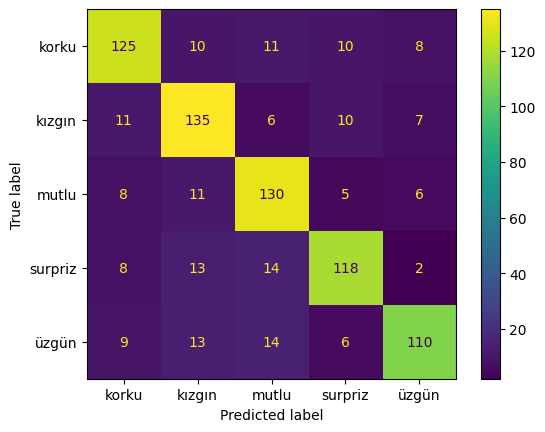

In [30]:
cm = confusion_matrix(label_test , y_pred_class , labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [31]:
msg_train , msg_test , label_train , label_test = train_test_split(df["word2vec"].tolist(), df["Label"].tolist() , test_size=0.2 , random_state=42)
knn = Pipeline([('knn' , KNeighborsClassifier())])
knn.fit(msg_train , label_train)
y_pred_class = knn.predict(msg_test)
print("knn accuracy score: " ,accuracy_score(label_test , y_pred_class))
print("knn f1 score:" , f1_score(label_test , y_pred_class , average="weighted"))

knn accuracy score:  0.3275
knn f1 score: 0.3172856954733596
